## Image Classification

## Import dependiencies and data

In [0]:
from tensorflow import keras
from keras.applications import DenseNet201
from keras.models import Sequential
from keras import layers, optimizers, losses, activations, models
from keras.layers import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My Drive/Assignment2/dataset

/content/gdrive/My Drive/Assignment2/dataset


In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_path = 'train'
test_path = 'test'
val_path = 'validation'

train_generator = train_datagen.flow_from_directory(train_path, target_size=(255,255), color_mode='rgb', batch_size=10, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(255,255), color_mode='rgb', batch_size=10, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(val_path, target_size=(255,255), color_mode='rgb', batch_size=10, class_mode='categorical')

step_size_train=train_generator.n//train_generator.batch_size
step_size_val=validation_generator.n//validation_generator.batch_size

Found 721 images belonging to 4 classes.
Found 225 images belonging to 4 classes.
Found 179 images belonging to 4 classes.


# Comparative study of different models' baseline performance

VGG16

In [0]:
from keras.applications.vgg16 import VGG16
base_vgg16 = VGG16(include_top=False, input_shape=(255,255,3))
model_vgg16 = models.Sequential()
model_vgg16.add(base_vgg16)
model_vgg16.add(layers.GlobalAveragePooling2D())
model_vgg16.add(layers.Dense(4, activation='softmax'))

for layer in base_vgg16.layers:
    layer.trainable = False

model_vgg16.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

history_vgg16 = model_vgg16.fit_generator(
      train_generator,
      steps_per_epoch=step_size_train,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=step_size_val,
      verbose=1)

score_vgg16 = model_vgg16.evaluate_generator(test_generator)
print('accuracy of vgg16: ', score_vgg16[1])

58892288/58889256 [==============================] - 1s 0us/step
Epoch 1/20
72/72 [==============================] - 282s 4s/step - loss: 1.1914 - acc: 0.5513 - val_loss: 0.9080 - val_acc: 0.6824
Epoch 2/20
72/72 [==============================] - 23s 323ms/step - loss: 0.9257 - acc: 0.7398 - val_loss: 0.8250 - val_acc: 0.7751
Epoch 3/20
72/72 [==============================] - 22s 300ms/step - loss: 0.7846 - acc: 0.7693 - val_loss: 0.7178 - val_acc: 0.8107
Epoch 4/20
72/72 [==============================] - 21s 297ms/step - loss: 0.7207 - acc: 0.7862 - val_loss: 0.7667 - val_acc: 0.8107
Epoch 5/20
72/72 [==============================] - 22s 301ms/step - loss: 0.6713 - acc: 0.7890 - val_loss: 0.9050 - val_acc: 0.7633
Epoch 6/20
72/72 [==============================] - 22s 300ms/step - loss: 0.6000 - acc: 0.8087 - val_loss: 0.4892 - val_acc: 0.8225
Epoch 7/20
72/72 [==============================] - 22s 301ms/step - loss: 0.5501 - acc: 0.8383 - val_loss: 0.2735 - val_acc: 0.7929
Epoch 

ResNet50

In [0]:
from keras.applications.resnet50 import ResNet50
base_res50 = ResNet50(include_top=False, input_shape=(255,255,3))
model_res50 = models.Sequential()
model_res50.add(base_res50)
model_res50.add(layers.GlobalAveragePooling2D())
model_res50.add(layers.Dense(4, activation='softmax'))

for layer in base_res50.layers:
    layer.trainable = False

model_res50.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

history_res50 = model_res50.fit_generator(
      train_generator,
      steps_per_epoch=step_size_train,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=step_size_val,
      verbose=1)

score_res50 = model_res50.evaluate_generator(test_generator)
print('accuracy of res50: ', score_res50[1])

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
Epoch 1/20
72/72 [==============================] - 26s 366ms/step - loss: 0.5620 - acc: 0.7834 - val_loss: 1.6319 - val_acc: 0.2706
Epoch 2/20
72/72 [==============================] - 23s 317ms/step - loss: 0.2645 - acc: 0.9044 - val_loss: 1.4519 - val_acc: 0.1953
Epoch 3/20
72/72 [==============================] - 22s 310ms/step - loss: 0.2738 - acc: 0.9142 - val_loss: 1.8415 - val_acc: 0.3136
Epoch 4/20
72/72 [==============================] - 22s 307ms/step - loss: 0.2044 - acc: 0.9367 - val_loss: 4.1137 - val_acc: 0.3018
Epoch 5/20
72/72 [==============================] - 21s 297ms/step - loss: 0.1602 - acc: 0.9423 - val_loss: 3.0517 - val_acc: 0.3077
Epoch 6/20
72/72 [==============================] - 22s 303ms/step - loss: 0.2356 - acc: 0.9423 - val_loss: 3.6693 - val_acc: 0.3373
Epoch 7/20
72/72 [==============================] - 21s 298ms/step - loss: 0.1503 - acc: 0.9542 - val_loss: 3.8078 - val_acc: 0.4852
Epoc

InceptionV3

In [0]:
from keras.applications.inception_v3 import InceptionV3
base_insv3 = InceptionV3(include_top=False, input_shape=(255,255,3))
model_insv3 = models.Sequential()
model_insv3.add(base_insv3)
model_insv3.add(layers.GlobalAveragePooling2D())
model_insv3.add(layers.Dense(4, activation='softmax'))

for layer in base_insv3.layers:
    layer.trainable = False

model_insv3.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

history_insv3 = model_insv3.fit_generator(
      train_generator,
      steps_per_epoch=step_size_train,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=step_size_val,
      verbose=1)

score_insv3 = model_insv3.evaluate_generator(test_generator)
print('accuracy of insv3: ', score_insv3[1])

87916544/87910968 [==============================] - 1s 0us/step
Epoch 1/20
72/72 [==============================] - 28s 384ms/step - loss: 1.0850 - acc: 0.5429 - val_loss: 0.6682 - val_acc: 0.7529
Epoch 2/20
72/72 [==============================] - 22s 303ms/step - loss: 0.6635 - acc: 0.7440 - val_loss: 0.3352 - val_acc: 0.8935
Epoch 3/20
72/72 [==============================] - 21s 289ms/step - loss: 0.4922 - acc: 0.8312 - val_loss: 0.3242 - val_acc: 0.9290
Epoch 4/20
72/72 [==============================] - 21s 292ms/step - loss: 0.4511 - acc: 0.8340 - val_loss: 0.1831 - val_acc: 0.8817
Epoch 5/20
72/72 [==============================] - 21s 293ms/step - loss: 0.4339 - acc: 0.8579 - val_loss: 0.4359 - val_acc: 0.9290
Epoch 6/20
72/72 [==============================] - 21s 287ms/step - loss: 0.4461 - acc: 0.8425 - val_loss: 0.1416 - val_acc: 0.9527
Epoch 7/20
72/72 [==============================] - 20s 279ms/step - loss: 0.3934 - acc: 0.8678 - val_loss: 0.2814 - val_acc: 0.9112
Epoc

DenseNet201

In [0]:
from keras.applications import DenseNet201
base_den201 = DenseNet201(include_top=False, input_shape=(255,255,3))
model_den201 = models.Sequential()
model_den201.add(base_den201)
model_den201.add(layers.GlobalAveragePooling2D())
model_den201.add(layers.Dense(4, activation='softmax'))

for layer in base_den201.layers:
    layer.trainable = False

model_den201.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

history_den201 = model_den201.fit_generator(
      train_generator,
      steps_per_epoch=step_size_train,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=step_size_val,
      verbose=1)

score_den201 = model_den201.evaluate_generator(test_generator)
print('accuracy of den201: ', score_den201[1])
print('loss of den201: ', score_den201[0])

74842112/74836368 [==============================] - 1s 0us/step
Epoch 1/20
72/72 [==============================] - 48s 667ms/step - loss: 0.8754 - acc: 0.6624 - val_loss: 0.6496 - val_acc: 0.8000
Epoch 2/20
72/72 [==============================] - 30s 424ms/step - loss: 0.4159 - acc: 0.8678 - val_loss: 0.3403 - val_acc: 0.9172
Epoch 3/20
72/72 [==============================] - 29s 404ms/step - loss: 0.3888 - acc: 0.8622 - val_loss: 0.2720 - val_acc: 0.8935
Epoch 4/20
72/72 [==============================] - 28s 395ms/step - loss: 0.2807 - acc: 0.9069 - val_loss: 0.2507 - val_acc: 0.9586
Epoch 5/20
72/72 [==============================] - 29s 396ms/step - loss: 0.3374 - acc: 0.8974 - val_loss: 0.1017 - val_acc: 0.9527
Epoch 6/20
72/72 [==============================] - 28s 393ms/step - loss: 0.2721 - acc: 0.9044 - val_loss: 0.3862 - val_acc: 0.9467
Epoch 7/20
72/72 [==============================] - 28s 395ms/step - loss: 0.2819 - acc: 0.8973 - val_loss: 0.1086 - val_acc: 0.9763
Epoc

NASNetLarge

In [0]:
from keras.applications import NASNetLarge
base_nas = NASNetLarge(include_top=False)
model_nas = models.Sequential()
model_nas.add(base_nas)
model_nas.add(layers.GlobalAveragePooling2D())
model_nas.add(layers.Dense(4, activation='softmax'))

for layer in base_nas.layers:
    layer.trainable = False

model_nas.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

train_generator_nas = train_datagen.flow_from_directory(train_path, target_size=(331,331), color_mode='rgb', batch_size=32, class_mode='categorical')
test_generator_nas = test_datagen.flow_from_directory(test_path, target_size=(331,331), color_mode='rgb', batch_size=32, class_mode='categorical')
validation_generator_nas = test_datagen.flow_from_directory(val_path, target_size=(331,331), color_mode='rgb', batch_size=32, class_mode='categorical')

history_nas = model_nas.fit_generator(
      train_generator_nas,
      steps_per_epoch=step_size_train,  
      epochs=20,
      validation_data=validation_generator_nas,
      validation_steps=step_size_val,
      verbose=1)

score_nas = model_nas.evaluate_generator(test_generator_nas)
print('accuracy of nasnet: ', score_nas[1])

343613440/343610240 [==============================] - 5s 0us/step
Found 721 images belonging to 4 classes.
Found 225 images belonging to 4 classes.
Found 179 images belonging to 4 classes.
Epoch 1/20
72/72 [==============================] - 268s 4s/step - loss: 0.5502 - acc: 0.8251 - val_loss: 0.6658 - val_acc: 0.8089
Epoch 2/20
72/72 [==============================] - 223s 3s/step - loss: 0.2286 - acc: 0.9354 - val_loss: 0.5991 - val_acc: 0.7802
Epoch 3/20
72/72 [==============================] - 222s 3s/step - loss: 0.1936 - acc: 0.9425 - val_loss: 0.3574 - val_acc: 0.8297
Epoch 4/20
72/72 [==============================] - 223s 3s/step - loss: 0.1762 - acc: 0.9438 - val_loss: 0.4541 - val_acc: 0.8574
Epoch 5/20
72/72 [==============================] - 225s 3s/step - loss: 0.1445 - acc: 0.9538 - val_loss: 0.4637 - val_acc: 0.8317
Epoch 6/20
72/72 [==============================] - 223s 3s/step - loss: 0.1239 - acc: 0.9637 - val_loss: 0.3545 - val_acc: 0.8495
Epoch 7/20
72/72 [======

# using DenseNet201 as feature extractor

In [0]:
base = DenseNet201(include_top=False, input_shape=(255,255,3))
model = models.Sequential()
model.add(base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

for layer in base.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=step_size_train,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=step_size_val,
      verbose=1)

score = model.evaluate_generator(test_generator)
print('accuracy: ', score[1])
print('loss: ', score[0])

74842112/74836368 [==============================] - 4s 0us/step
Epoch 1/20
72/72 [==============================] - 428s 6s/step - loss: 1.1006 - acc: 0.5513 - val_loss: 0.9382 - val_acc: 0.5529
Epoch 2/20
72/72 [==============================] - 20s 274ms/step - loss: 0.5778 - acc: 0.7947 - val_loss: 1.3106 - val_acc: 0.5030
Epoch 3/20
72/72 [==============================] - 19s 259ms/step - loss: 0.5612 - acc: 0.7876 - val_loss: 0.2317 - val_acc: 0.9231
Epoch 4/20
72/72 [==============================] - 19s 264ms/step - loss: 0.5120 - acc: 0.8340 - val_loss: 0.1896 - val_acc: 0.9527
Epoch 5/20
72/72 [==============================] - 19s 264ms/step - loss: 0.3948 - acc: 0.8389 - val_loss: 0.2191 - val_acc: 0.9349
Epoch 6/20
72/72 [==============================] - 19s 260ms/step - loss: 0.5020 - acc: 0.8376 - val_loss: 0.2050 - val_acc: 0.9645
Epoch 7/20
72/72 [==============================] - 18s 255ms/step - loss: 0.3955 - acc: 0.8537 - val_loss: 0.0616 - val_acc: 0.9467
Epoch 

# Using best performing model to make predictions


In [0]:
# Define function to plot sample images

def plots(ims, figsize=(24,12), rows=2, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

Found 225 images belonging to 4 classes.


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


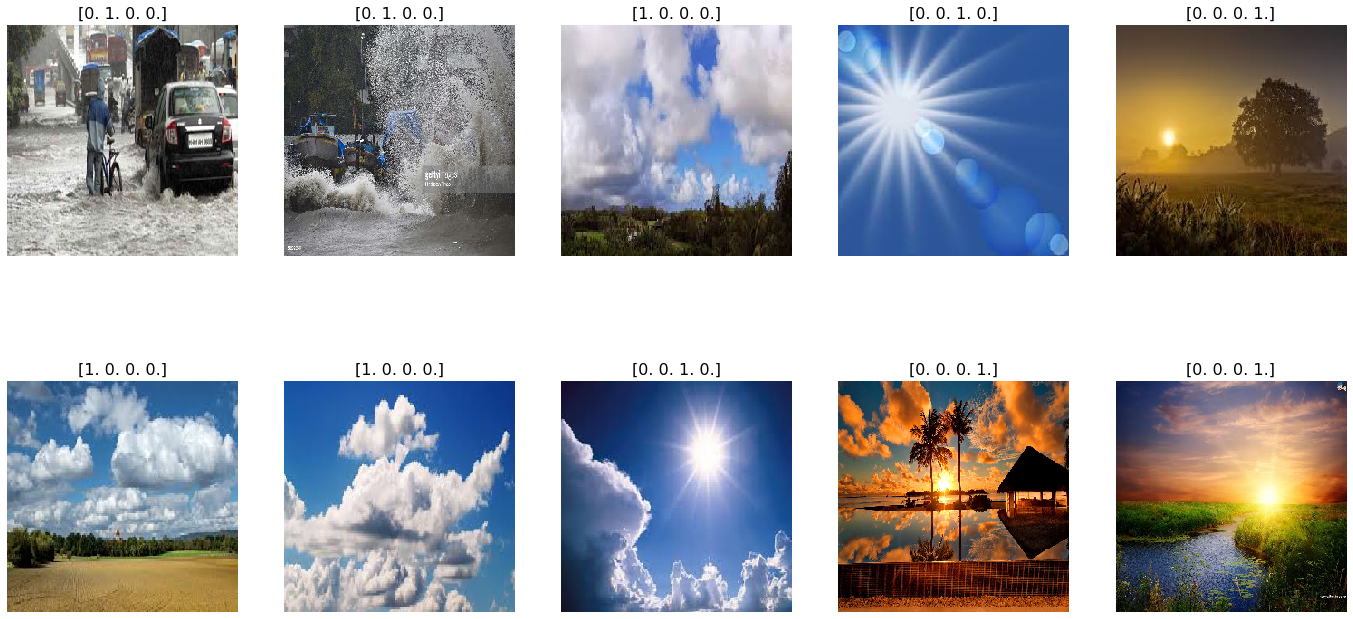

In [0]:
# Plot sample images with labels

test_datagen_pred = ImageDataGenerator()
test_generator_pred = test_datagen_pred.flow_from_directory(test_path, target_size=(255,255), color_mode='rgb', batch_size=10, class_mode='categorical')

test_imgs, test_labels = next(test_generator_pred)
plots(test_imgs, titles=test_labels)

In [0]:
# Make predictions

imgs = test_imgs/255
his = model.predict(imgs)
result = np.ndarray.round(his)
print(result)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


# using DenseNet201 as weight initialiser

In [0]:
base = DenseNet201(include_top=False, input_shape=(255,255,3))
model = models.Sequential()
model.add(base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=step_size_train,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=step_size_val,
      verbose=1)

score = model.evaluate_generator(test_generator)
print('accuracy: ', score[1])

Epoch 1/20
72/72 [==============================] - 222s 3s/step - loss: 0.8821 - acc: 0.7145 - val_loss: 7.1070 - val_acc: 0.3471
Epoch 2/20
72/72 [==============================] - 92s 1s/step - loss: 0.8154 - acc: 0.7271 - val_loss: 12663.9004 - val_acc: 0.3018
Epoch 3/20
72/72 [==============================] - 92s 1s/step - loss: 0.6477 - acc: 0.8003 - val_loss: 2042.6074 - val_acc: 0.2012
Epoch 4/20
72/72 [==============================] - 92s 1s/step - loss: 0.5361 - acc: 0.8256 - val_loss: 4.6414 - val_acc: 0.4852
Epoch 5/20
72/72 [==============================] - 92s 1s/step - loss: 0.6982 - acc: 0.7707 - val_loss: 9.5180 - val_acc: 0.5089
Epoch 6/20
72/72 [==============================] - 93s 1s/step - loss: 0.5032 - acc: 0.8292 - val_loss: 0.9923 - val_acc: 0.6686
Epoch 7/20
72/72 [==============================] - 91s 1s/step - loss: 0.8097 - acc: 0.7521 - val_loss: 420.8994 - val_acc: 0.2899
Epoch 8/20
72/72 [==============================] - 93s 1s/step - loss: 0.5467 -

# Architecture Modification

Remove last dense block

In [0]:
base = DenseNet201(include_top=False, input_shape=(255,255,3))

base_model = Model(inputs=base.input, outputs=base.get_layer('pool4_relu').output)

model = Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=step_size_train,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=step_size_val,
      verbose=1)

score = model.evaluate_generator(test_generator)
print('accuracy: ', score[1])

Epoch 1/20
72/72 [==============================] - 147s 2s/step - loss: 0.7195 - acc: 0.7426 - val_loss: 880.5522 - val_acc: 0.3118
Epoch 2/20
72/72 [==============================] - 77s 1s/step - loss: 0.5915 - acc: 0.8059 - val_loss: 21.1158 - val_acc: 0.3373
Epoch 3/20
72/72 [==============================] - 77s 1s/step - loss: 0.4349 - acc: 0.8594 - val_loss: 0.4087 - val_acc: 0.6213
Epoch 4/20
72/72 [==============================] - 77s 1s/step - loss: 0.4005 - acc: 0.8819 - val_loss: 4.7336 - val_acc: 0.6509
Epoch 5/20
72/72 [==============================] - 77s 1s/step - loss: 0.4243 - acc: 0.8650 - val_loss: 2.6875 - val_acc: 0.6627
Epoch 6/20
72/72 [==============================] - 77s 1s/step - loss: 0.3770 - acc: 0.8819 - val_loss: 2.6687 - val_acc: 0.7160
Epoch 7/20
72/72 [==============================] - 77s 1s/step - loss: 0.3168 - acc: 0.8945 - val_loss: 6.6023 - val_acc: 0.5444
Epoch 8/20
72/72 [==============================] - 77s 1s/step - loss: 0.3572 - acc: 

Remove last two dense blocks

In [0]:
base = DenseNet201(include_top=False, input_shape=(255,255,3))

base_model = Model(inputs=base.input, outputs=base.get_layer('pool3_relu').output)

model = Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=step_size_train,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=step_size_val,
      verbose=1)

score = model.evaluate_generator(test_generator)
print('accuracy: ', score[1])

Epoch 1/20
72/72 [==============================] - 53s 736ms/step - loss: 0.6232 - acc: 0.7792 - val_loss: 3.0912 - val_acc: 0.6706
Epoch 2/20
72/72 [==============================] - 38s 534ms/step - loss: 0.4917 - acc: 0.8368 - val_loss: 0.3927 - val_acc: 0.6982
Epoch 3/20
72/72 [==============================] - 39s 535ms/step - loss: 0.4431 - acc: 0.8467 - val_loss: 1.2276 - val_acc: 0.6568
Epoch 4/20
72/72 [==============================] - 39s 535ms/step - loss: 0.3880 - acc: 0.8579 - val_loss: 3.5751 - val_acc: 0.5858
Epoch 5/20
72/72 [==============================] - 39s 538ms/step - loss: 0.3590 - acc: 0.8875 - val_loss: 2.2531 - val_acc: 0.6154
Epoch 6/20
72/72 [==============================] - 39s 542ms/step - loss: 0.3249 - acc: 0.8958 - val_loss: 0.2978 - val_acc: 0.8817
Epoch 7/20
72/72 [==============================] - 38s 532ms/step - loss: 0.3580 - acc: 0.9017 - val_loss: 1.3935 - val_acc: 0.7337
Epoch 8/20
72/72 [==============================] - 39s 538ms/step - 

Remove last dense block, keep layers in DenseNet freezed

In [0]:
# Remove last dense block, keep layers in DenseNet freezed

base = DenseNet201(include_top=False, input_shape=(255,255,3))

base_model = Model(inputs=base.input, outputs=base.get_layer('pool4_relu').output)

model = Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

for layer in base.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=step_size_train,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=step_size_val,
      verbose=1)

score = model.evaluate_generator(test_generator)
print('accuracy: ', score[1])

Epoch 1/20
72/72 [==============================] - 36s 494ms/step - loss: 1.2848 - acc: 0.4290 - val_loss: 1.2507 - val_acc: 0.5176
Epoch 2/20
72/72 [==============================] - 25s 349ms/step - loss: 1.1191 - acc: 0.6371 - val_loss: 1.1111 - val_acc: 0.7515
Epoch 3/20
72/72 [==============================] - 25s 348ms/step - loss: 0.9940 - acc: 0.7947 - val_loss: 1.0255 - val_acc: 0.8521
Epoch 4/20
72/72 [==============================] - 25s 350ms/step - loss: 0.8846 - acc: 0.8453 - val_loss: 0.8217 - val_acc: 0.9290
Epoch 5/20
72/72 [==============================] - 25s 348ms/step - loss: 0.8177 - acc: 0.8551 - val_loss: 0.6942 - val_acc: 0.8994
Epoch 6/20
72/72 [==============================] - 25s 352ms/step - loss: 0.7516 - acc: 0.8467 - val_loss: 0.5861 - val_acc: 0.9467
Epoch 7/20
72/72 [==============================] - 25s 353ms/step - loss: 0.7279 - acc: 0.8565 - val_loss: 0.6151 - val_acc: 0.9704
Epoch 8/20
72/72 [==============================] - 25s 352ms/step - 

Adding convolutional layers

In [0]:
base = DenseNet201(include_top=False, input_shape=(255,255,3))

model = Sequential()
model.add(base)

model.add(Conv2D(8, (1,1), activation='relu'))
model.add(Conv2D(4, (1,1), activation='relu'))
model.add(Conv2D(4, (3,3), activation='relu'))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='softmax'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

for layer in base.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=step_size_train,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=step_size_val,
      verbose=1)

score = model.evaluate_generator(test_generator)
print('accuracy: ', score[1])

Epoch 1/20
72/72 [==============================] - 49s 674ms/step - loss: 1.3664 - acc: 0.3207 - val_loss: 1.2964 - val_acc: 0.3235
Epoch 2/20
72/72 [==============================] - 29s 401ms/step - loss: 1.3276 - acc: 0.3544 - val_loss: 1.2669 - val_acc: 0.6154
Epoch 3/20
72/72 [==============================] - 29s 399ms/step - loss: 1.3186 - acc: 0.3404 - val_loss: 1.3366 - val_acc: 0.3846
Epoch 4/20
72/72 [==============================] - 29s 402ms/step - loss: 1.2427 - acc: 0.4627 - val_loss: 1.1517 - val_acc: 0.5621
Epoch 5/20
72/72 [==============================] - 29s 398ms/step - loss: 1.1974 - acc: 0.4557 - val_loss: 1.1053 - val_acc: 0.5740
Epoch 6/20
72/72 [==============================] - 29s 399ms/step - loss: 1.1949 - acc: 0.4895 - val_loss: 1.1399 - val_acc: 0.5799
Epoch 7/20
72/72 [==============================] - 29s 405ms/step - loss: 1.1551 - acc: 0.4880 - val_loss: 0.9481 - val_acc: 0.5562
Epoch 8/20
72/72 [==============================] - 29s 409ms/step - 